In [1]:
# Insert project token here

# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - BanCoppel

<hr>

## Instalando Librerias

In [2]:
!pip install scikit-learn --upgrade

/bin/bash: pip: command not found


In [3]:
!pip install xgboost --upgrade

/bin/bash: pip: command not found


In [4]:
!pip install imblearn --upgrade

/bin/bash: pip: command not found


<hr>

## Descargar los conjuntos de datos en formato .csv

In [5]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, Normalizer
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [6]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'training_dataset.csv')
df_training_dataset.tail()

--2020-09-18 05:21:45--  https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/training_dataset.csv
Resolving gitlab.com (gitlab.com)... 2606:4700:90:0:f22e:fbec:5bed:a9b9, 172.65.251.78
Connecting to gitlab.com (gitlab.com)|2606:4700:90:0:f22e:fbec:5bed:a9b9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘training_dataset.csv.23’

training_dataset.cs     [    <=>             ]   2.22M   315KB/s    in 8.0s    

2020-09-18 05:21:57 (284 KB/s) - ‘training_dataset.csv.23’ saved [2327419]



,ID,Genero,Años,Estado_civil,Trabajo,Sector,Telefono,Anos_usando_internet_banking,Anos_usando_banca_movil,Banca_movil_userfriendly,Frecuencia_internet_banking_mes,Frecuencia_banca_movil_mes,Frecuencia_pagamentos_tarjeta_mes,Frecuencia_tarjeta_virtual_mes,Frecuencia_saldo_cuenta_mes,TARGET
23994,160,F,40.0,Soltero,Profesor,Sector privado,Iphone 6+,10.0,3.0,Si,31.0,0.0,0.0,0.0,31.0,Perfil_3
23995,155,F,24.0,NaN,Profesor,Institucion publica,L G,15.0,6.0,Si,30.0,30.0,31.0,30.0,7.0,Perfil_0
23996,229,F,24.0,Casado,Profesor,Desempleados,LG V10,5.0,3.0,Si,0.0,30.0,1.0,0.0,0.0,Perfil_4
23997,214,F,24.0,Soltero,Desempleados,Desempleados,Android,5.0,6.0,No,7.0,0.0,1.0,1.0,0.0,Perfil_4
23998,30,M,30.0,Casado,Servidor publico,Institucion publica,0,5.0,4.0,No,31.0,31.0,0.0,0.0,0.0,Perfil_3


Sobre el archivo "training_dataset.csv", temos alguna información sobre los usuarios de la app de BanCoppel:

**ID**

**Genero**

**Idade**

**Estado_civil**

**Trabajo**

**Sector**

**Telefono**

**Anos_usando_internet_banking**

**Anos_usando_banca_movil**

**Banca_movil_userfriendly**

**Frecuencia_internet_banking_mes**

**Frecuencia_banca_movil_mes**

**Frecuencia_pagamentos_tarjeta_mes**

**Frecuencia_tarjeta_virtual_mes**

**Frecuencia_saldo_cuenta_mes**

**TARGET**

In [7]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23999 entries, 0 to 23998
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 23999 non-null  int64  
 1   Genero                             23110 non-null  object 
 2   Años                               23731 non-null  float64
 3   Estado_civil                       23295 non-null  object 
 4   Trabajo                            21044 non-null  object 
 5   Sector                             23640 non-null  object 
 6   Telefono                           22578 non-null  object 
 7   Anos_usando_internet_banking       23355 non-null  float64
 8   Anos_usando_banca_movil            22698 non-null  float64
 9   Banca_movil_userfriendly           23999 non-null  object 
 10  Frecuencia_internet_banking_mes    21275 non-null  float64
 11  Frecuencia_banca_movil_mes         22728 non-null  flo

In [8]:
df_training_dataset.nunique()

ID                                   250
Genero                                 3
Años                                   6
Estado_civil                           2
Trabajo                               31
Sector                                 4
Telefono                              73
Anos_usando_internet_banking           5
Anos_usando_banca_movil                6
Banca_movil_userfriendly               2
Frecuencia_internet_banking_mes        7
Frecuencia_banca_movil_mes             7
Frecuencia_pagamentos_tarjeta_mes      7
Frecuencia_tarjeta_virtual_mes         7
Frecuencia_saldo_cuenta_mes            8
TARGET                                 6
dtype: int64

## Historgrama de varibales

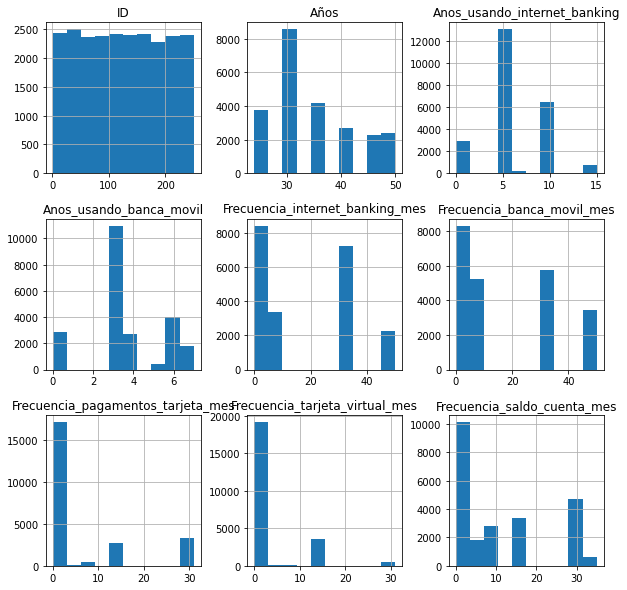

In [9]:
hist = df_training_dataset.hist(figsize=(10,10))

### Parametros del Entorno

In [10]:
semilla_aleatoria = 1234
umbral_categoria = 10
umbral_correlacion = 0.6
pd.options.display.max_columns=21
columna_target = 'TARGET'
categorias_target = []

In [11]:
def obtener_frecuencia_columnas(df_temp):
    columnas_con_frecuencia = [] 
    categorias_target=[]
    for columna in df_temp.columns:    
        df_frecuencia_cat=df_temp.groupby([columna],as_index=False).size()
        
        if len(df_frecuencia_cat)<umbral_categoria:
            if columna != columna_target:
                columnas_con_frecuencia.append(columna)
            else:
                categorias_target = df_frecuencia_cat[columna].values                
            print(df_frecuencia_cat)
    return columnas_con_frecuencia, categorias_target
columnas_categoricas, categorias_target = obtener_frecuencia_columnas(df_training_dataset)
print("Columnas con frecuencias: ",columnas_categoricas)
print("Categorias target: ",categorias_target)

  Genero   size
0      0     92
1      F  10030
2      M  12988
   Años  size
0  24.0  3728
1  30.0  8546
2  35.0  4145
3  40.0  2669
4  45.0  2244
5  50.0  2399
  Estado_civil   size
0       Casado  11887
1      Soltero  11408
                Sector   size
0         Desempleados   2210
1  Institucion publica   9515
2       Sector privado  11205
3        Selfemployed     710
   Anos_usando_internet_banking   size
0                           0.0   2935
1                           5.0  13020
2                           6.0    198
3                          10.0   6471
4                          15.0    731
   Anos_usando_banca_movil   size
0                      0.0   2822
1                      3.0  10967
2                      4.0   2733
3                      5.0    396
4                      6.0   3995
5                      7.0   1785
  Banca_movil_userfriendly   size
0                       No   8599
1                       Si  15400
   Frecuencia_internet_banking_mes  size
0      

## Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos

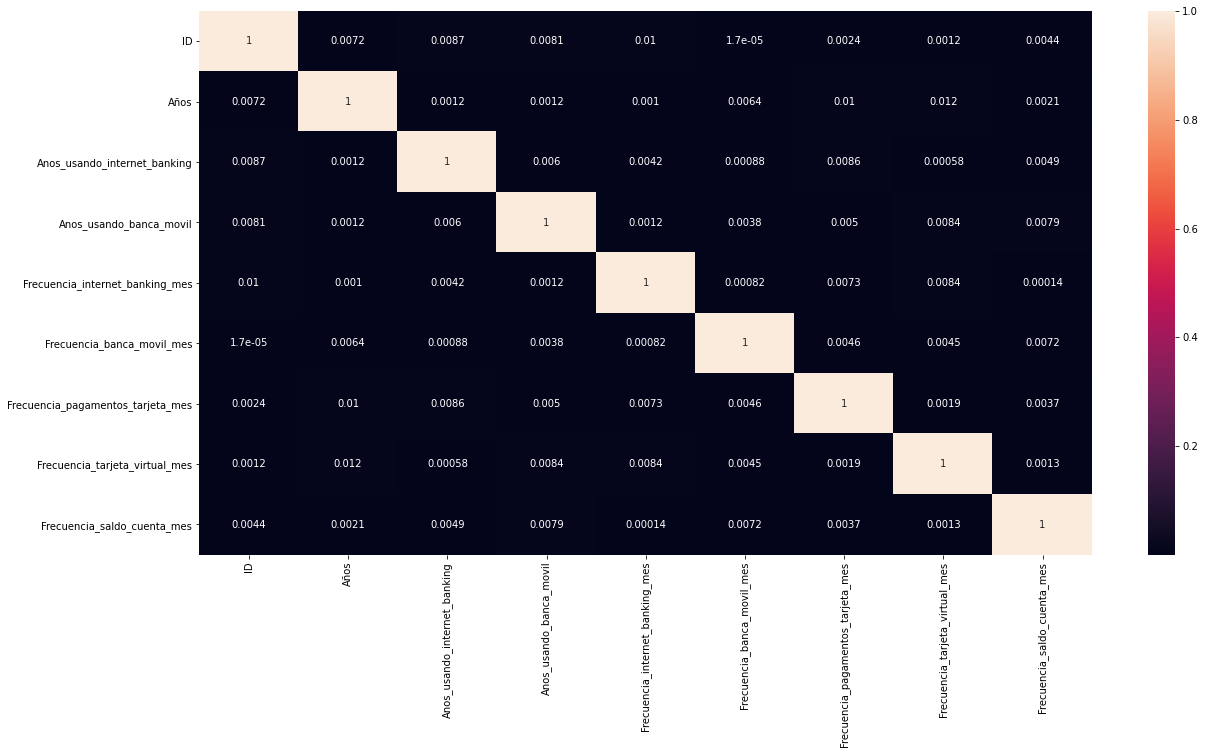

In [12]:
def graficar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    plt.figure(figsize = (20, 10))
    sns.heatmap(df_temp[var_num].corr().abs(), annot = True)
    
graficar_correlaciones(df_training_dataset)

### Mostrar Correlaciones

In [13]:
def mostrar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    df_cols = df_temp[var_num].corr().stack().reset_index()
    df_cols.columns = ['VariableA','VariableB','correlation']
    df_corr = df_cols[(df_cols['correlation']>0.6)&(df_cols['correlation']!=1)]
    display(df_corr)
mostrar_correlaciones(df_training_dataset)

,VariableA,VariableB,correlation


<hr>

## Desglose del desafío: clasificación multiclase

Este es un desafio cuyo objetivo de negocio es la segmentación de usuario de aplicativos de BanCopp. Podemos utilizar  dos enfoques: Machine Learning supervisado (clasificación) o no supervisado (clustering). En este desafío será usado la clasificación porque el conjunto de datos ya está disponible con "labels", o en otras palabras, ya con la variable objetivo. 

En la biblioteca scikit-learn tenemos diversos algoritmos para clasificación. El participante es libre para utilizar el framework que desee para completar este desafío.

En este notebook será mostrado un ejemplo usando el algoritmo "Decision Tree" para clasificar los estudantes en seis diferentes perfiles.

# ¡Atención!

La columna objetivo de este desafío es la columna ``TARGET``

<hr>

## Pre-procesando el dataset antes del entrenamiento

### Removiendo todas las lineas que poseen algun valor nulo en determinadas columnas

Usando el método Pandas **DataFrame.dropna()** usted puede remover todas las lineas nulas del dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [14]:
# Mostrando los datos nulos del dataset antes de la primera transformación (df)
print("Valores nulos del df_training_dataset antes de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset antes de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



### Revisar

In [15]:
# Aplicando la función para borrar todas las lines con valore NaN en las siguientes columnas:
# df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'TARGET'])

In [16]:
# # Mostrando los datos nulos del dataset despues de la primera transformación (df)
print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                      0
Genero                                889
Años                                  268
Estado_civil                          704
Trabajo                              2955
Sector                                359
Telefono                             1421
Anos_usando_internet_banking          644
Anos_usando_banca_movil              1301
Banca_movil_userfriendly                0
Frecuencia_internet_banking_mes      2724
Frecuencia_banca_movil_mes           1271
Frecuencia_pagamentos_tarjeta_mes     285
Frecuencia_tarjeta_virtual_mes        475
Frecuencia_saldo_cuenta_mes           570
TARGET                                  0
dtype: int64



### Procesando valores NaN con SimpleImputer de sklearn

Para los valores NaN, usaremos a substituición por la constante 0 como **ejemplo**.

Usted puede escoger la estrategía que crea mejor para tratar los valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [17]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')
    
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
class DataScaleImputer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        transformer = ColumnTransformer(transformers=[('scaler',StandardScaler(),features.values)])
        X_transform = transformer.fit_transform(df_temp[features.values])
        X_imputed_df = pd.DataFrame(data = X_transform, index = X.index, columns = features.values)        
        return pd.concat([df_temp[self.columns],X_imputed_df],axis=1)
    
class DataLabelEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X):
        return self
    
    def transform(self, X):    
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        encoder = LabelEncoder()        
        df_encoder= df_temp[self.columns].apply(encoder.fit_transform)             
        return pd.concat([df_temp[features],df_encoder],axis=1)
    
class DataOneHotEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):                
        return pd.get_dummies(X, columns=self.columns)   

In [18]:
def validar_nulos(df_temp):
    print(df_temp.shape)
    print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_temp.isnull().sum(axis = 0)))

In [19]:
columnas_numericas = df_training_dataset._get_numeric_data().columns.values.tolist()
columnas = df_training_dataset.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
print(columnas_numericas)
print(columnas_no_numericas)

['ID', 'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes']
['Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Banca_movil_userfriendly', 'TARGET']


In [20]:
df2 = DataFrameImputer().fit_transform(df_training_dataset)
validar_nulos(df2)

(23999, 16)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

ID                                   0
Genero                               0
Años                                 0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Banca_movil_userfriendly             0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
TARGET                               0
dtype: int64



In [21]:
df3 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df2)
validar_nulos(df3)

(23999, 16)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Genero                               0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Banca_movil_userfriendly             0
TARGET                               0
ID                                   0
Años                                 0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
dtype: int64



In [22]:
columnas_encoder =  [v for v in columnas_no_numericas if v not in [columna_target] ]
df4 = DataLabelEncoderTransform(columns=columnas_encoder).fit_transform(df3)
validar_nulos(df4)

(23999, 16)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

TARGET                               0
ID                                   0
Años                                 0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
Genero                               0
Estado_civil                         0
Trabajo                              0
Sector                               0
Telefono                             0
Banca_movil_userfriendly             0
dtype: int64



# Representamos gráficamente las características

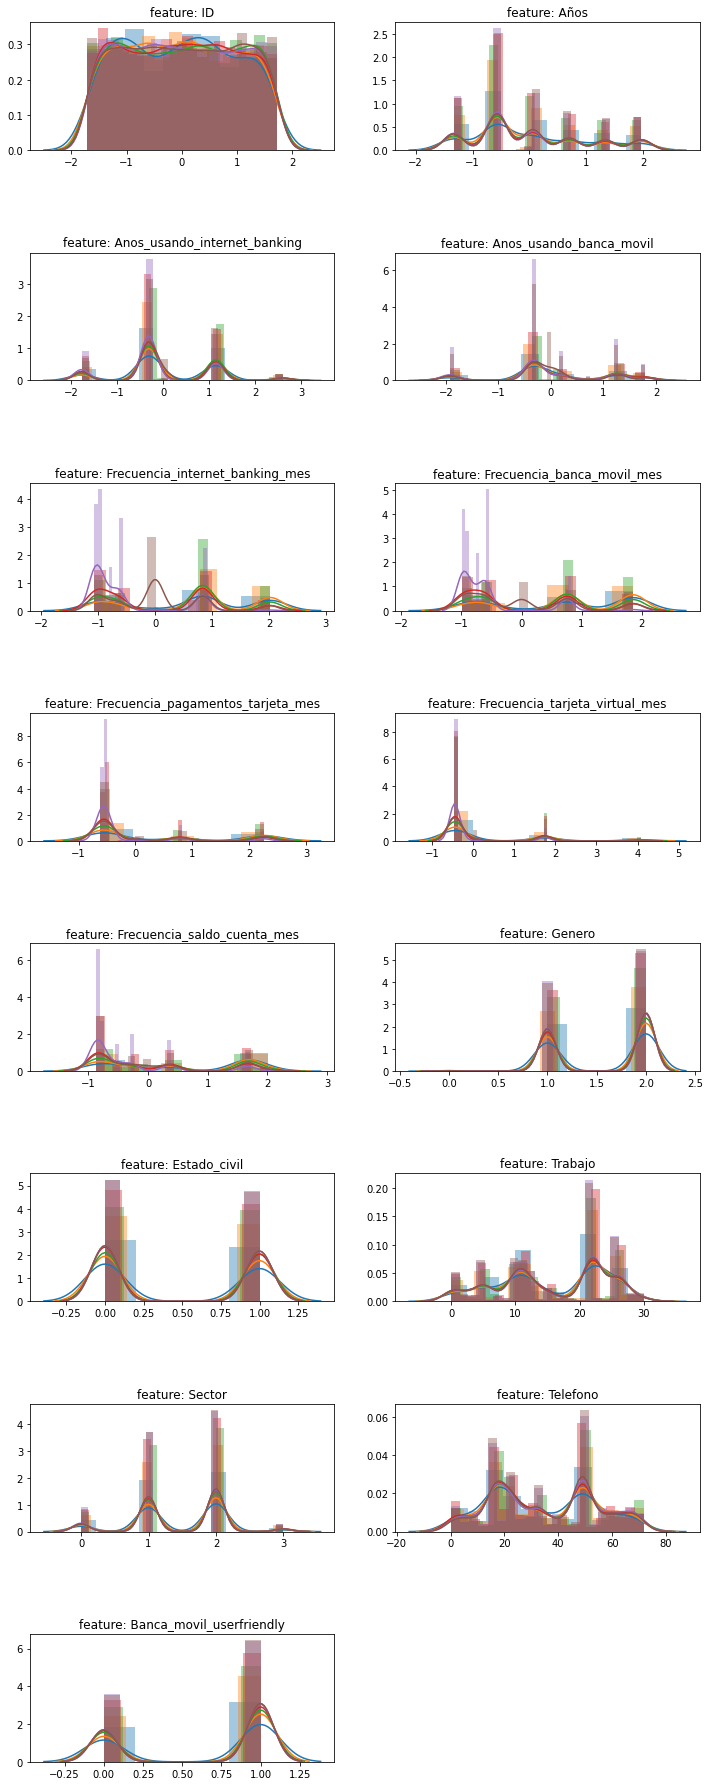

In [23]:
def graficar_caraterisitcas(df_norm,categorias_target,columna_target):   
    features = df_norm.drop(columna_target, axis=1)
    plt.figure(figsize=(12,32))
    gs = gridspec.GridSpec(8, 2)
    gs.update(hspace=0.8)

    for i, f in enumerate(features):
        ax = plt.subplot(gs[i])
        for col in categorias_target:
            sns.distplot(df_norm[f][df_norm[columna_target] == col])        
        ax.set_xlabel('')
        ax.set_title('feature: ' + str(f))
    plt.show()
graficar_caraterisitcas(df4,categorias_target,columna_target)

In [24]:
def plot_scatter_pca(finalDf, targets, col_target):    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)    
    colors = ['c', 'g', 'b','y','r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[col_target] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   
                   , s = 50)
    ax.legend(targets)
    ax.grid()

def graficar_modelo_PCA(df_temp,columna_target):
    columnas_modelo = [v for v in df_temp.columns if v not in [columna_target]]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_temp[columnas_modelo])
    principalDf = pd.DataFrame(data = X_pca, index = df4.index
             , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df_temp[columna_target]], axis = 1)
    plot_scatter_pca(finalDf,categorias_target, columna_target)


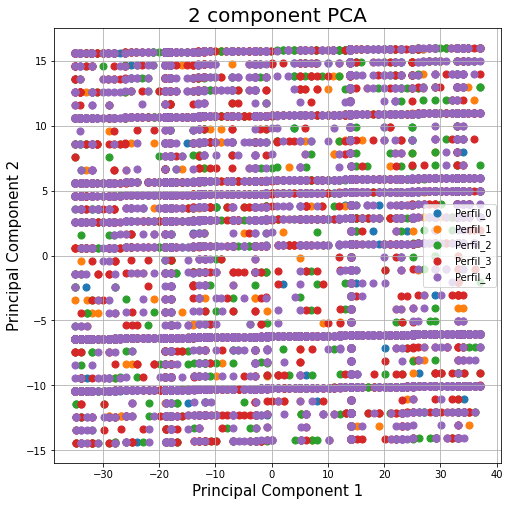

In [25]:
graficar_modelo_PCA(df4,columna_target)

(23999, 13)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

TARGET                               0
Años                                 0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
Genero                               0
Estado_civil                         0
Sector                               0
Banca_movil_userfriendly             0
dtype: int64



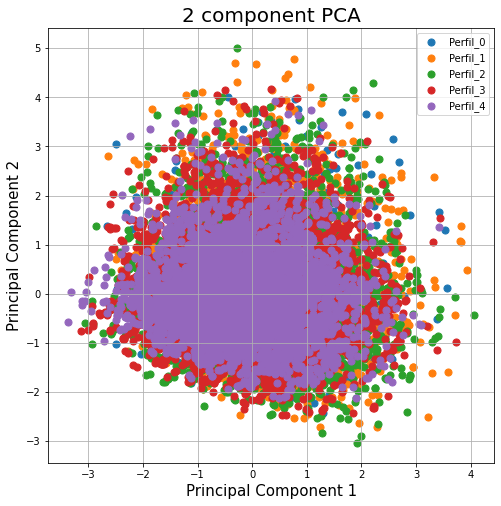

In [26]:
df5 = DropColumns(columns=['ID','Telefono','Trabajo']).fit_transform(df4)
validar_nulos(df5)
graficar_modelo_PCA(df5,columna_target)

In [27]:
carateristicas_encoder = ['Sector','Genero', 'Estado_civil', 'Banca_movil_userfriendly','Años']
df6 = DataOneHotEncoderTransform(columns=carateristicas_encoder).fit_transform(df5)
validar_nulos(df6)

(23999, 26)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

TARGET                               0
Anos_usando_internet_banking         0
Anos_usando_banca_movil              0
Frecuencia_internet_banking_mes      0
Frecuencia_banca_movil_mes           0
Frecuencia_pagamentos_tarjeta_mes    0
Frecuencia_tarjeta_virtual_mes       0
Frecuencia_saldo_cuenta_mes          0
Sector_0                             0
Sector_1                             0
Sector_2                             0
Sector_3                             0
Genero_0                             0
Genero_1                             0
Genero_2                             0
Estado_civil_0                       0
Estado_civil_1                       0
Banca_movil_userfriendly_0           0
Banca_movil_userfriendly_1           0
Años_-1.3322079380248213             0
Años_-0.570632980226898              0
Años_0.0                             0
Años_0.0640128179380382              0
Años_0.6986586

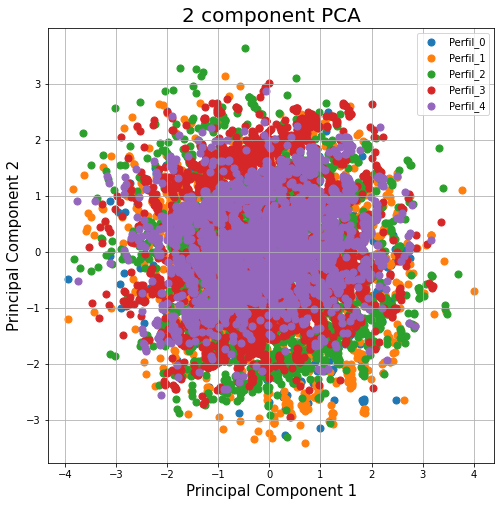

In [28]:
graficar_modelo_PCA(df6,columna_target)

In [29]:
import random
def agregar_datos_sinteticos(df_val):
    for targ in categorias_target:
        df_graduado = df_val[df_val[columna_target]==targ]
        for i in range (0,5500):
            columnas = df_graduado.columns.values    
            index = random.randint(1000000000, 90000000000)       
            df_temp = pd.DataFrame(data=[], index=[index],columns = columnas)
            for columna in columnas:       
                df_seleccionado = df_graduado.sample()
                df_temp.at[index , columna] = df_seleccionado[columna].values[0]                    
            df_val=pd.concat([df_val,df_temp])
    return df_val
#df7 = agregar_datos_sinteticos(df6)
#validar_nulos(df7)
df7=df6

In [30]:
columnas_modelo = [v for v in df7.columns if v not in ['TARGET']]
print(columnas_modelo)

features = df7[
    columnas_modelo
]

target = df7['TARGET']  ## No cambie esta variable

['Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes', 'Sector_0', 'Sector_1', 'Sector_2', 'Sector_3', 'Genero_0', 'Genero_1', 'Genero_2', 'Estado_civil_0', 'Estado_civil_1', 'Banca_movil_userfriendly_0', 'Banca_movil_userfriendly_1', 'Años_-1.3322079380248213', 'Años_-0.570632980226898', 'Años_0.0', 'Años_0.0640128179380382', 'Años_0.6986586161029744', 'Años_1.3333044142679105', 'Años_1.9679502124328467']


In [31]:
from sklearn.decomposition import PCA
def obtener_modelo_PCA(df_temp,columna_target,dim):
    columnas_modelo = [v for v in df_temp.columns if v not in [columna_target]]
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(df_temp[columnas_modelo])
    principalDf = pd.DataFrame(data = X_pca, index = df4.index)
    finalDf = pd.concat([principalDf, df_temp[columna_target]], axis = 1)
    return finalDf

In [32]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=semilla_aleatoria)

In [33]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
semilla_aleatoria = 1234
class_RFO = RandomForestClassifier(n_estimators=1000, min_samples_split= 5, min_samples_leaf=4, max_features= 'sqrt', max_depth= 20, bootstrap=True, random_state=semilla_aleatoria)
class_RNN = MLPClassifier(solver='adam',max_iter=2000, learning_rate='adaptive', hidden_layer_sizes=(10, 40, 2), alpha=0.1, activation='relu', random_state=semilla_aleatoria)
class_ABO = AdaBoostClassifier(n_estimators= 936, learning_rate= 0.1, algorithm= 'SAMME.R',random_state=semilla_aleatoria)
class_XGB = XGBClassifier(subsample= 0.7, objective='reg:linear', n_estimators= 200, min_child_weight= 1, max_depth= 3, learning_rate= 0.1, colsample_bytree= 0.5)
dtc_model = VotingClassifier(estimators=[('RFOR', class_RFO),('RNN',class_RNN),('ABO', class_ABO),('XGB',class_XGB)], voting='hard')
dtc_model.fit(X_train, y_train)

VotingClassifier(estimators=[('RFOR',
                              RandomForestClassifier(max_depth=20,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=5,
                                                     n_estimators=1000,
                                                     random_state=1234)),
                             ('RNN',
                              MLPClassifier(alpha=0.1,
                                            hidden_layer_sizes=(10, 40, 2),
                                            learning_rate='adaptive',
                                            max_iter=2000, random_state=1234)),
                             ('ABO',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=936,
                                      

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
#class_SVC = SVC(C=1000,kernel='rbf',random_state=semilla_aleatoria,gamma='auto')
#kmeans = 
#kmeans.fit(X_train, y_train)
#Create a Gaussian Classifier
dtc_model = MLPClassifier()
dtc_model.fit(X_train, y_train)


/home/ubuntu/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [46]:
y_pred = dtc_model.predict(X_test)
print(y_pred)

['Perfil_3' 'Perfil_5' 'Perfil_4' ... 'Perfil_1' 'Perfil_5' 'Perfil_1']


In [ ]:
model = keras.Sequential([    
    keras.layers.Dense(300, input_dim=25, activation='relu',kernel_regularizer=regularizers.l2(0.001),kernel_initializer='he_uniform'),  
    
    keras.layers.Dense(5, activation='sigmoid')
    ])
#keras.layers.Dense(1, activation='sigmoid')
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])


In [ ]:
model.fit(X_train, y_train, epochs=100,verbose=0, validation_data=(X_test, y_test), batch_size=5)

In [ ]:
test_loss, test_acc, test_recall,test_precision = model.evaluate(X_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

### Analizando la calidad del modelo a través de la matriz de confusión

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

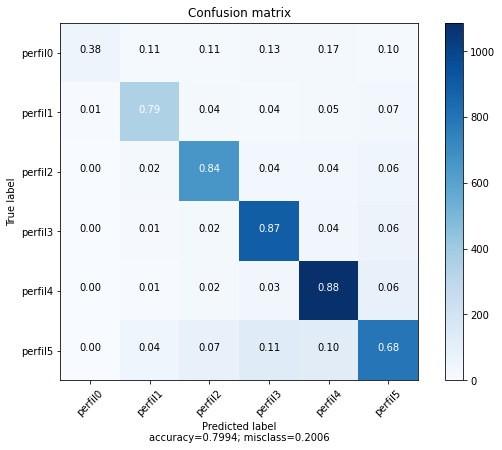

In [47]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['perfil0', 'perfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5'])

<hr>

## Scoring de los datos necesarios para entregar la solución

Como entrega de su solución, esperamos los resultados clasificados del seguiente dataset llamado "to_be_scored.csv":

### Download la "Hoja de evaluación"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

# ¡Atención!

El dataframe ``to_be_scored`` en su "hoja de evaluación". Note que la columna "categoria" no existe en esta muetra, por lo que no puede ser utilizada para entrenar modelos supervisados

In [ ]:
df_to_be_scored.info()

<hr>

# ¡Atención!

# Para poder aplicar su modelo y clasificar la hoja de evaluación, usted debe aplicar primero todas las transformaciones de columna que usted aplico en el dataset de entrenamiento.

# No remueva o adicione filas en la hoja de evaluación. 

# No altere el orden de las filas en la hoja de evaluación. 

# Al final, las 1000 entradas deben estar clasificadas, con los valores calculados en una columna llamada "target"

<hr>

En la celda de abajo, repetimos rapidamente los mismos pasos de pré-procesamiento usados en el ejemplo dado con árbol de decisión

In [ ]:
# 1 - Removiendo filas con valores NaN 
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Genero', 'Años', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil', 'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes', 'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes', 'Frecuencia_saldo_cuenta_mes'])

# 2 - Reemplazando con ceros los valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoción de columnas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['ID', 'Genero', 'Estado_civil', 'Trabajo', 'Sector', 'Telefono'], inplace=False)

# 4 - Encoding con "dummy variables"
df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Banca_movil_userfriendly'])

df_to_be_scored_4.tail()

<hr>

Puede verificar abajo que las columnas de la hoja de evaluación son identicas a las usadas para entrenar el modelo:

In [ ]:
df_training[
    [
        'Años', 'Anos_usando_internet_banking', 'Anos_usando_banca_movil',
       'Frecuencia_internet_banking_mes', 'Frecuencia_banca_movil_mes',
       'Frecuencia_pagamentos_tarjeta_mes', 'Frecuencia_tarjeta_virtual_mes',
       'Frecuencia_saldo_cuenta_mes', 'Banca_movil_userfriendly_No',
       'Banca_movil_userfriendly_Si'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atención

Para todas las columnas que no existiren en "df_to_be_scored", usted puede usar la tecnica de abajo para adicionarla:

In [ ]:
df_to_be_scored_4['Banca_movil_userfriendly_No'] = 0

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Guardando la hoja de evaluacion como un archivo .csv para ser enviado
**SI YA TIENE UN DATA ASSET CON EL NOMBRE results.csv EN ESTE PROYECTO O EN OTRO PROYECTO DE WATSON STUDIO DEBE BORRAR EL ARCHIVO ANTES DE CORRER LA SIGUIENTE CELDA O TENDRA EL ERROR: _RuntimeError: File 'results.csv' already exists in storage._**

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# ATENCIÓN

# La ejecución de la celda anterior creará un nuevo "data asset" en su proyecto de Watson Studio. Deberá descargar este archivo junto con este cuaderno y crear un archivo zip con results.csv y notebook.ipynb para enviarlo. (los archivos deben tener este nombre)

<hr>

## ¡Felicitaciones!
Si ya está satisfecho con su solución, vaya a la página siguiente y envíe los archivos necesarios para su envío.

# https://bancoppel.maratona.dev
